In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import importlib

from misc import load_csv_dataset

In [ ]:
df = pd.DataFrame(load_csv_dataset("names.csv"))

In [ ]:
#découpage des noms en nom, postnom et prénom
#contrainte : tenir compte des noms composés (eg. ILUNGA WA ILUNGA MARC)
#             tenir compte des manquants (eg. LOKUA KANZA, KASONGO GERMAINE) 

df['split'] = df['name'].str.strip().str.split()
df = df[df['split'].notna() & df['split'].str.len() > 0]
df['nom'] = df['split'].apply(lambda x: x[0] if len(x) >= 1 else "null")
df['prenom'] = df['split'].apply(lambda x: x[-1] if len(x) >= 2 else "null")
df['postnom'] = df['split'].apply(lambda x: ' '.join(x[1:-1]) if len(x) > 2 else "null")
df.drop(columns=['split'], inplace=True)
df[['name', 'nom', 'postnom', 'prenom']].head()

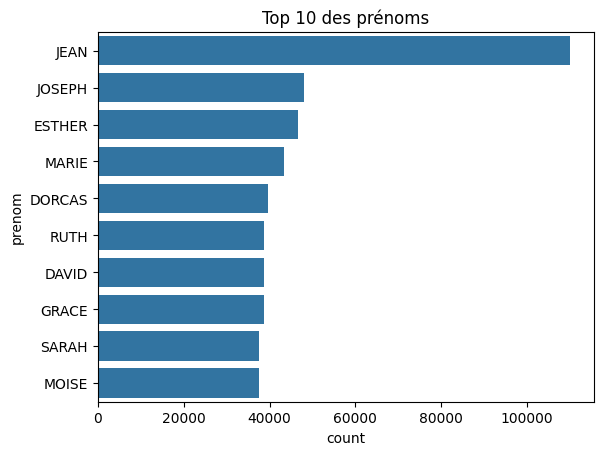

In [5]:
# Distribution simple des prénoms (affichage des 10 prénoms les plus populaires)
sns.countplot(y=df['prenom'], order=df['prenom'].value_counts().iloc[:10].index)
plt.title("Top 10 des prénoms")
plt.show()

In [9]:
prenoms = df['prenom'].value_counts()
df_prenoms = prenoms.reset_index()
df_prenoms.columns = ['prenom', 'nombre']
df_prenoms.head(10)

,prenom,nombre
0,JEAN,110011
1,JOSEPH,48119
2,ESTHER,46597
3,MARIE,43267
4,DORCAS,39549
5,RUTH,38785
6,DAVID,38748
7,GRACE,38639
8,SARAH,37571
9,MOISE,37498
